In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt

import pandas as pd

In [2]:
churn_data = pd.read_csv('https://raw.githubusercontent.com/'
                         'treselle-systems/customer_churn_analysis/'
                         'master/WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
churn_data = churn_data.set_index('customerID')
churn_data = churn_data.drop(['TotalCharges'], axis=1)

# The dataset is naturally heirarchical: some columns only apply to some users. Ex, if you don't have internet 
# then the column OnlineBackup isn't applicable, as it's value is "No internet service". We 
# are going to map this back to No. We will treat the hierachical nature by stratifying on the 
# different services a user may have. 
churn_data = churn_data.applymap(lambda x: "No" if str(x).startswith("No ") else x)

strata_cols = ['InternetService', 'StreamingMovies', 'StreamingTV', 'PhoneService']

df = pd.get_dummies(churn_data, 
                    columns=churn_data.columns.difference(strata_cols + ['tenure', 'MonthlyCharges']), 
                    drop_first=True)

In [4]:
from lifelines import CoxPHFitter

cph = CoxPHFitter().fit(df, 'tenure', 'Churn_Yes', strata=strata_cols)

In [5]:
cph

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

In [6]:
cph.print_summary()

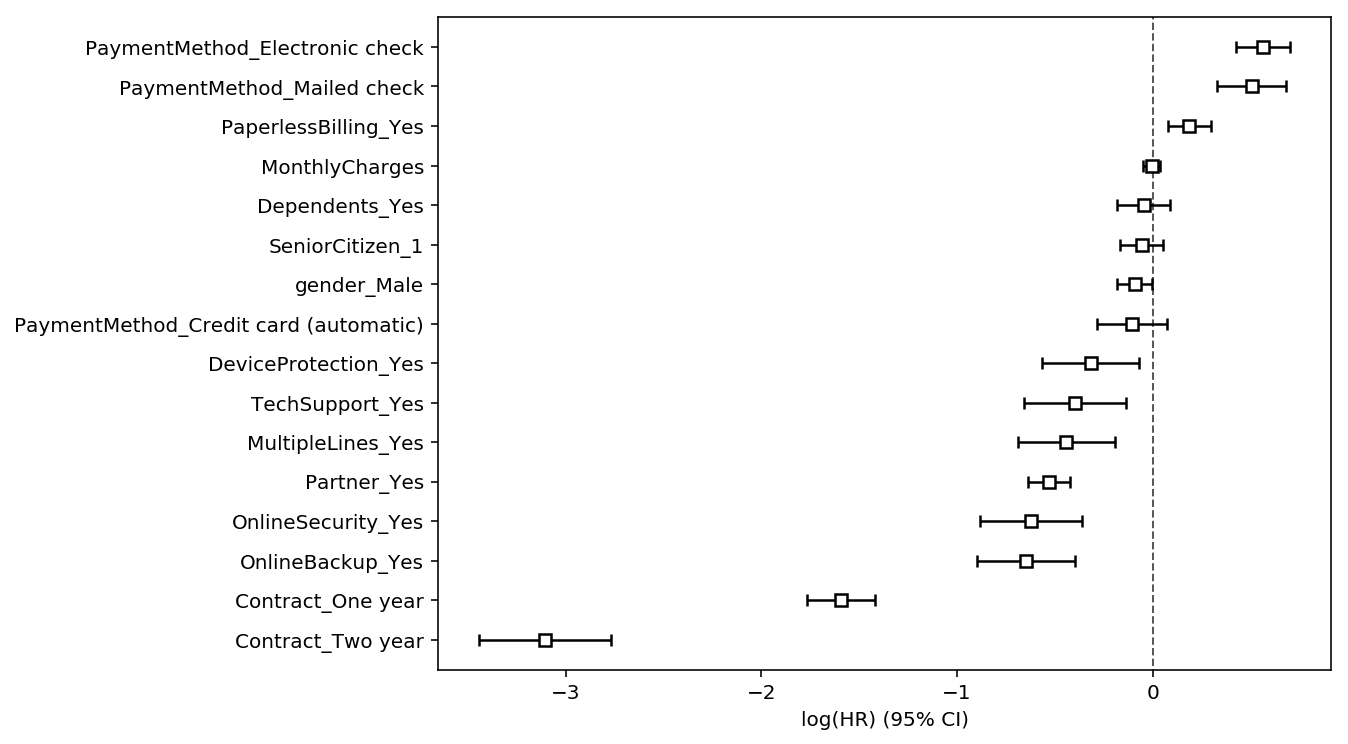

In [7]:
ax = plt.subplots(figsize=(8, 6))
cph.plot(ax=ax[1])

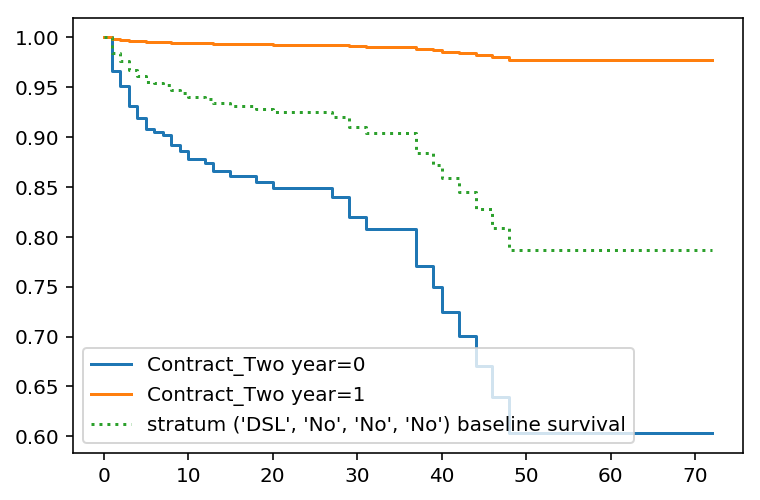

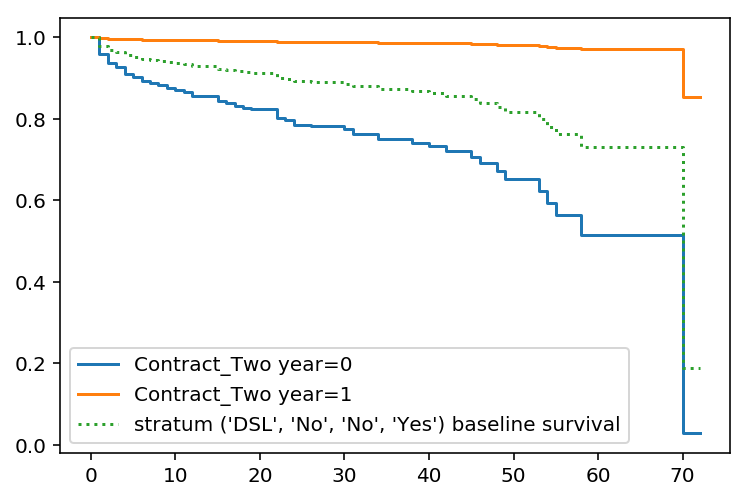

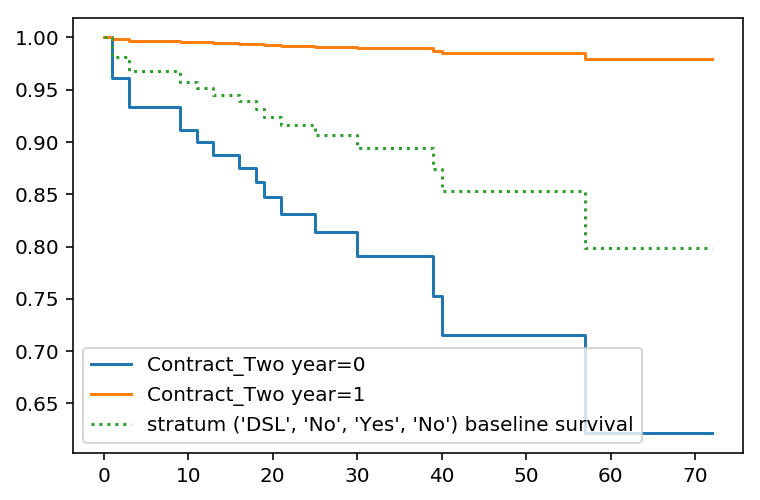

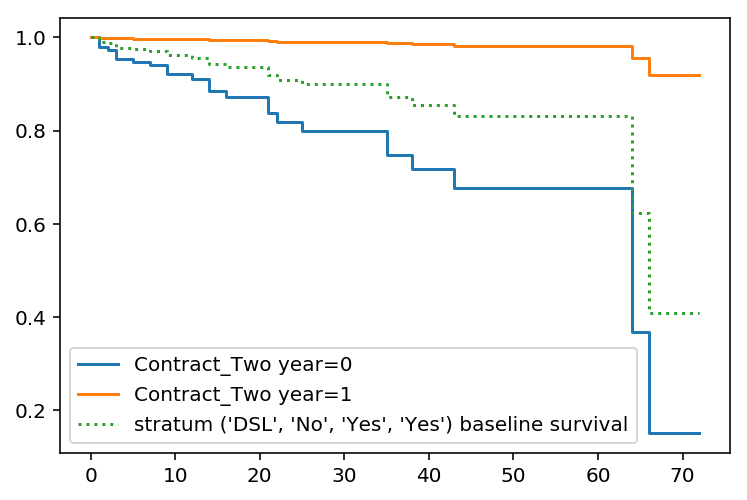

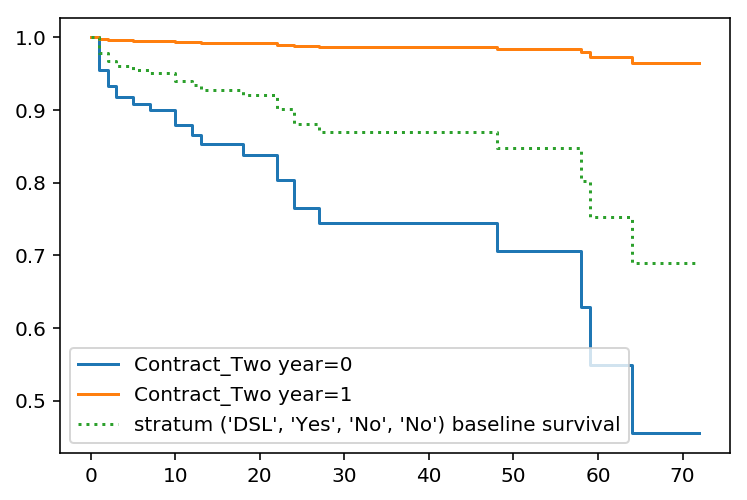

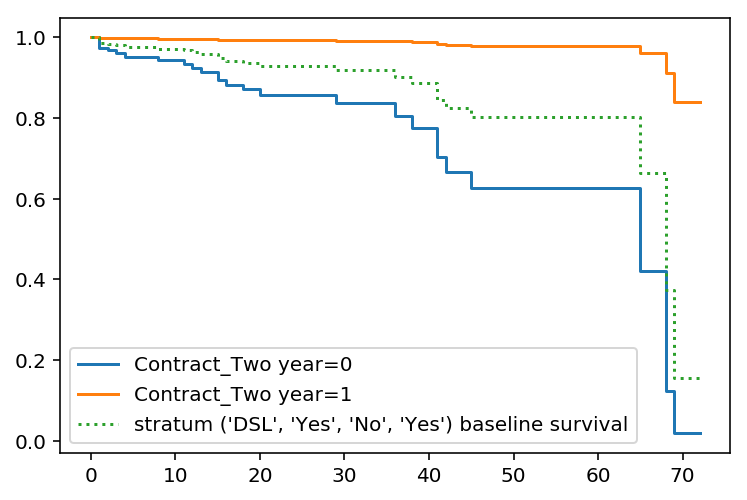

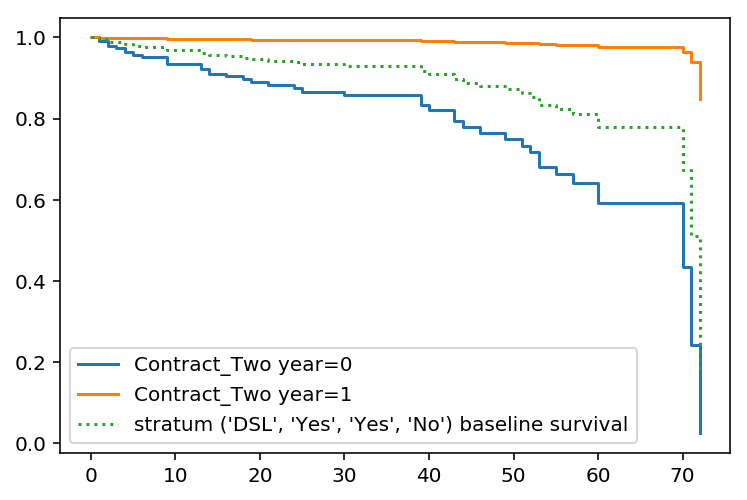

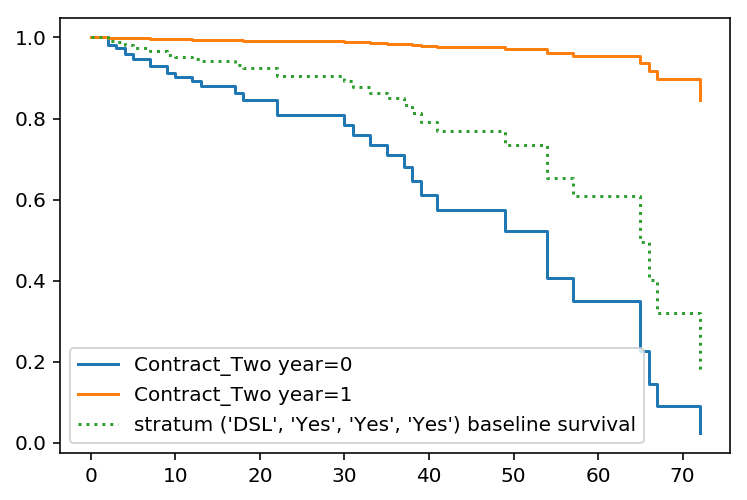

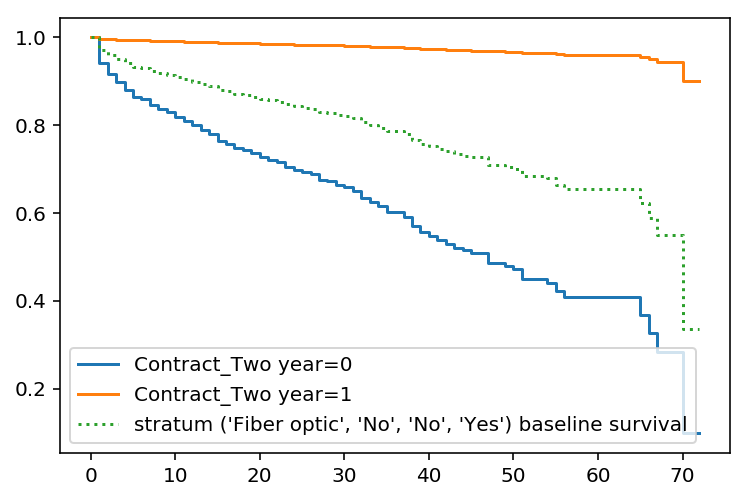

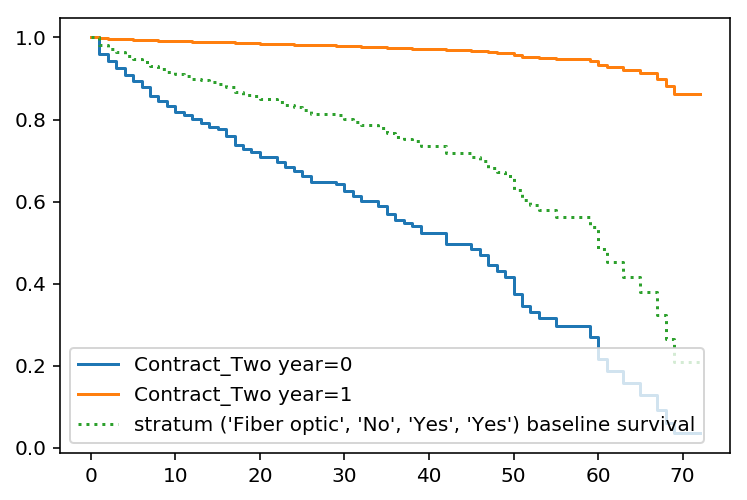

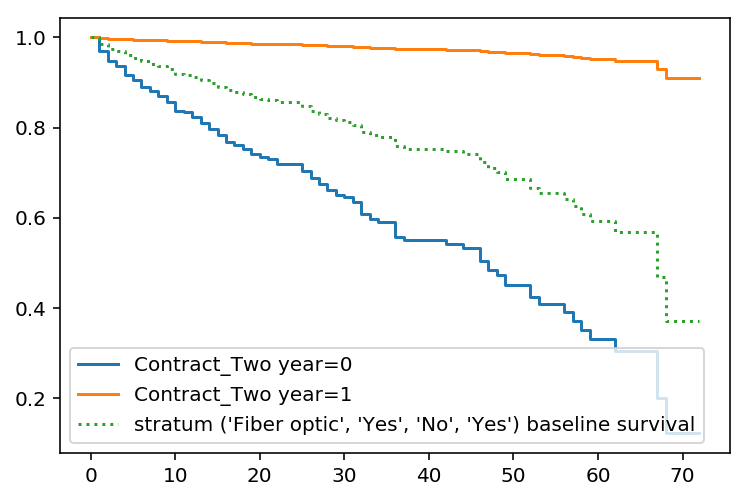

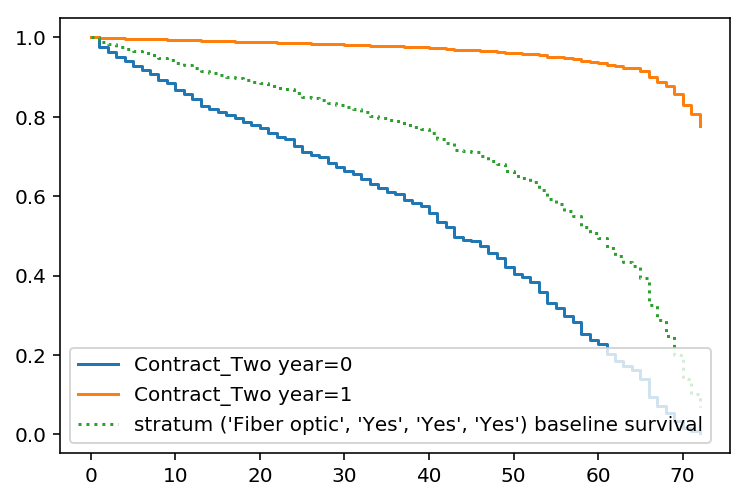

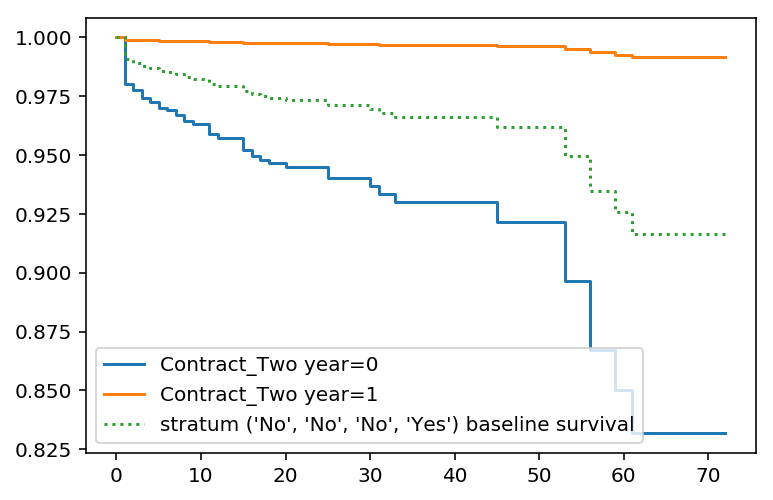

In [8]:
cph.plot_covariate_groups('Contract_Two year', values=[0, 1]);